https://zhuanlan.zhihu.com/p/425664064

In [1]:
import numpy as np
import pandas as pd
import akshare as ak
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(123)

## 准备数据

In [2]:
# 白噪声
white_noise = np.random.standard_normal(size=1000)

# 随机游走
x = np.random.standard_normal(size=1000)
random_walk = np.cumsum(x)

# GDP
df = ak.macro_china_gdp()
df = df.set_index('季度')
df.index = pd.to_datetime(df.index)
gdp = df['国内生产总值-绝对值'][::-1].astype('float')

# GDP DIFF
gdp_diff = gdp.diff(4).dropna()

## 自相关系数

In [3]:
import statsmodels.api as sm
X = [2, 3, 4, 3, 8, 7]
print(sm.tsa.stattools.acf(X, nlags=1, adjusted=True))

[1.        0.3559322]


## 可视化数据

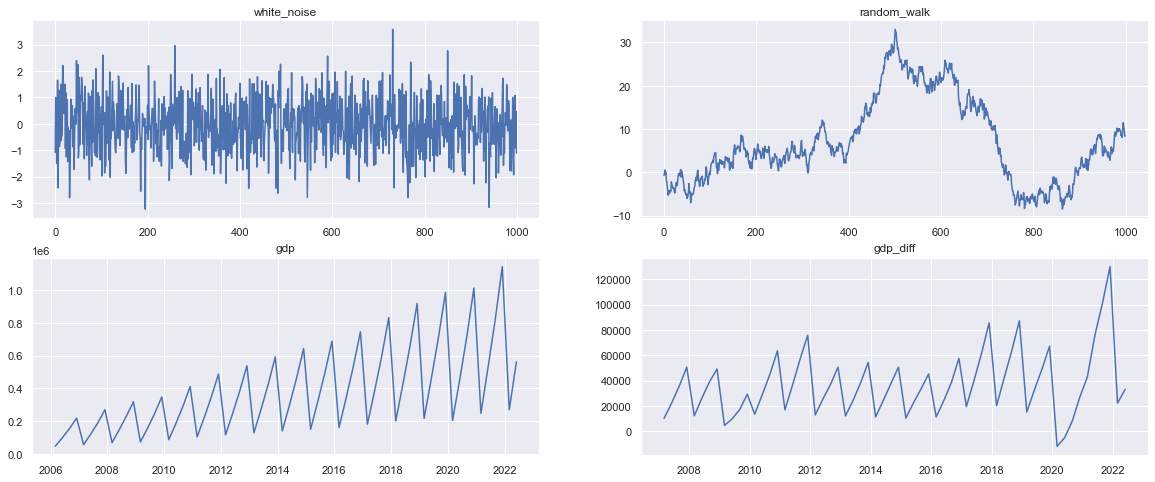

In [4]:
# -------------- 绘制图形 --------------
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

ax[0][0].plot(white_noise)
ax[0][0].set_title('white_noise')
ax[0][1].plot(random_walk)
ax[0][1].set_title('random_walk')

ax[1][0].plot(gdp)
ax[1][0].set_title('gdp')
ax[1][1].plot(gdp_diff)
ax[1][1].set_title('gdp_diff')

plt.show()

## 可视化统计特征
蓝色区域为95%置信区间

c:\Program Files\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\stats

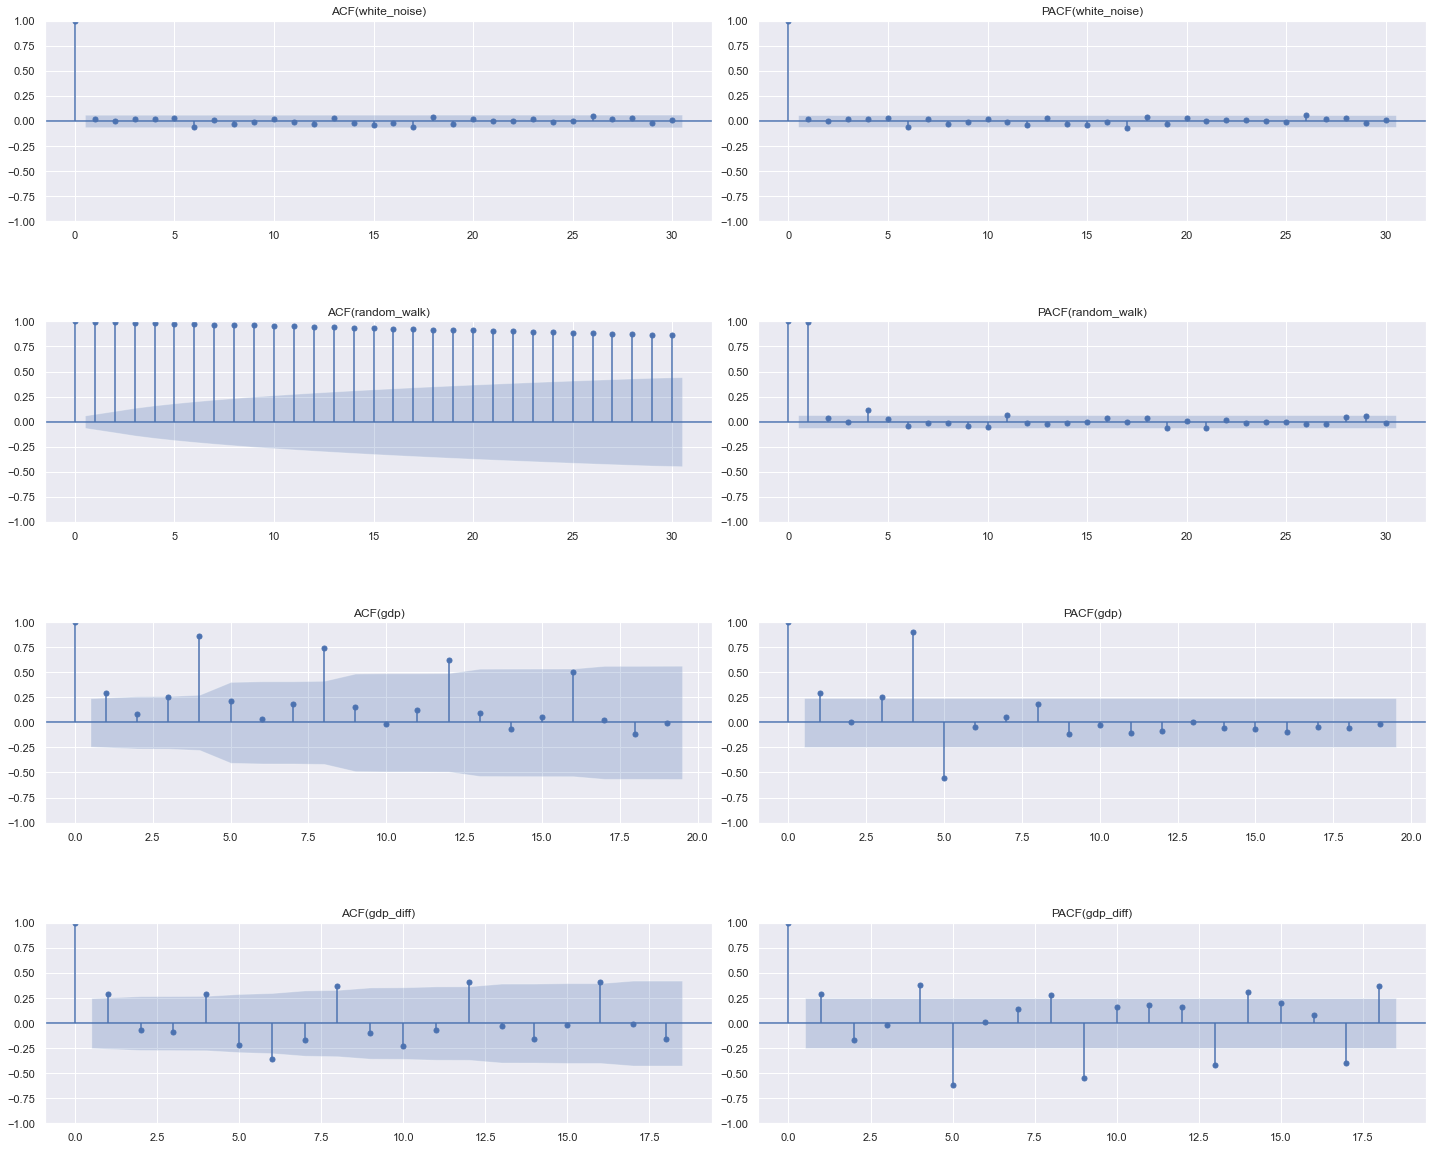

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(4, 2, figsize=(20, 16))
fig.tight_layout()

fig.subplots_adjust(hspace=0.5)

plot_acf(white_noise, ax=ax[0][0])
ax[0][0].set_title('ACF(white_noise)')
plot_pacf(white_noise, ax=ax[0][1])
ax[0][1].set_title('PACF(white_noise)')

plot_acf(random_walk, ax=ax[1][0])
ax[1][0].set_title('ACF(random_walk)')
plot_pacf(random_walk, ax=ax[1][1])
ax[1][1].set_title('PACF(random_walk)')

plot_acf(gdp, ax=ax[2][0])
ax[2][0].set_title('ACF(gdp)')
plot_pacf(gdp, ax=ax[2][1])
ax[2][1].set_title('PACF(gdp)')

plot_acf(gdp_diff, ax=ax[3][0])
ax[3][0].set_title('ACF(gdp_diff)')
plot_pacf(gdp_diff, ax=ax[3][1])
ax[3][1].set_title('PACF(gdp_diff)')

plt.show()

## 假设检验方法

原假设：序列存在单位根（时间序列是非平稳的）\
备择假设：序列不存在单位根（时间序列是平稳的或趋势平稳的）\
\
不指定trend情况下不能拒绝原假设，非平稳；\
指定trend='ct'时p值小于0.05，拒绝原假设，
带截距项和时间趋势平稳。

In [16]:
import numpy as np
from arch.unitroot import DFGLS

np.random.seed(123)

y = gdp
dfgls = DFGLS(y, trend='c', lags=30)
print(dfgls.summary().as_text())

dfgls = DFGLS(y, trend='ct', lags=30)
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -0.599
P-value                         0.474
Lags                               30
-------------------------------------

Trend: Constant
Critical Values: -3.05 (1%), -2.40 (5%), -2.09 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                  0.031
P-value                         0.996
Lags                               30
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.02 (1%), -3.36 (5%), -3.04 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
